In [1]:
import glob
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import matplotlib.pyplot as plt
import os.path
import scipy
import helper_utils

In [2]:
# Conveniently list available tracks to analyze
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split('.npy')[0], available_track_files))
available_track_names

['reInvent2019_track',
 '2022_august_open',
 'Canada_Training',
 'canada_race',
 'Tokyo_Training_track',
 'Oval_track',
 'New_York_Track',
 'Bowtie_track',
 'H_track',
 'reinvent_base',
 '2022_september_open',
 'Mexico_track',
 'Virtual_May19_Train_track',
 'Straight_track',
 'AWS_track',
 'China_track',
 '2022_july_open',
 '2022_june_open',
 'London_Loop_Train']

In [3]:
# Replace the name here with the track to analyze
TRACK_NAME = '2022_september_open'

# Load the center, inner, outer waypoints
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Separate into center, inner, outer waypoints
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

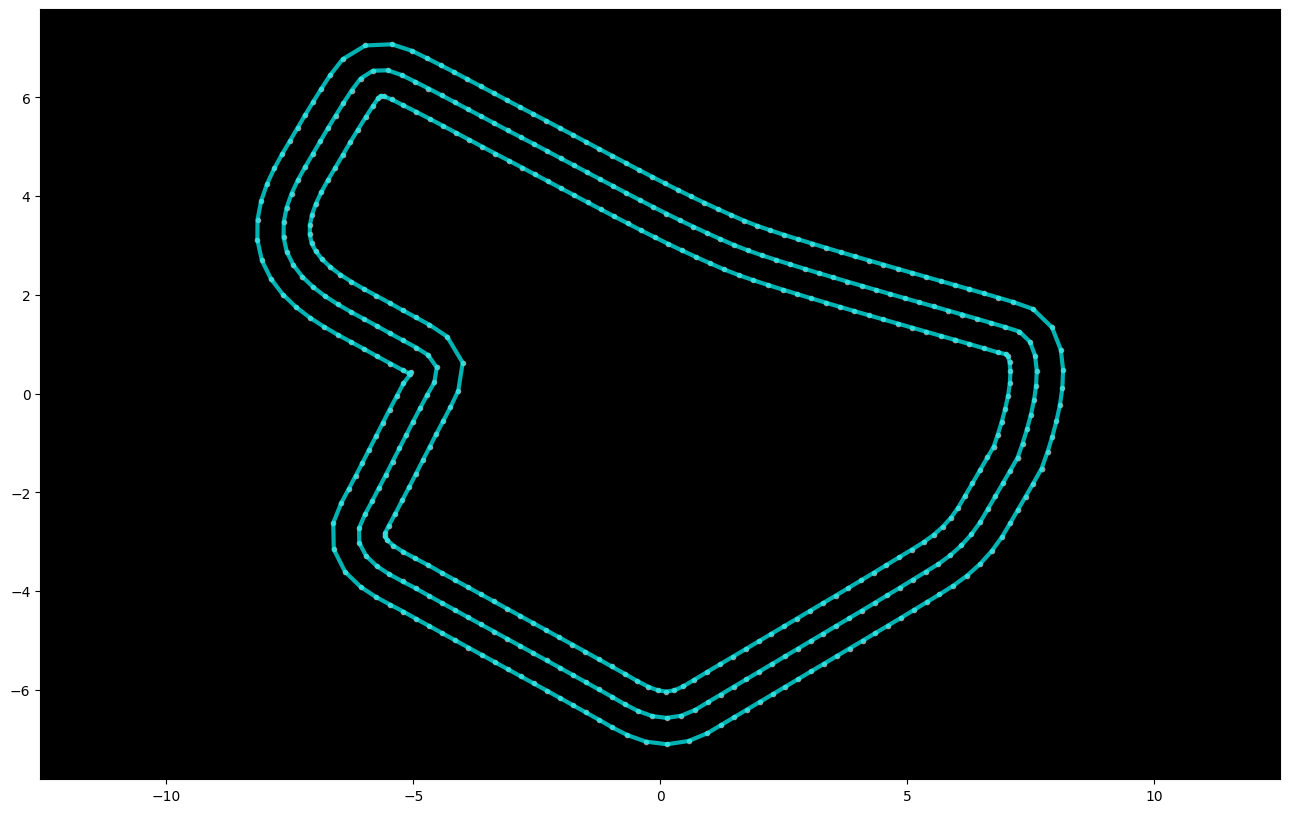

In [4]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

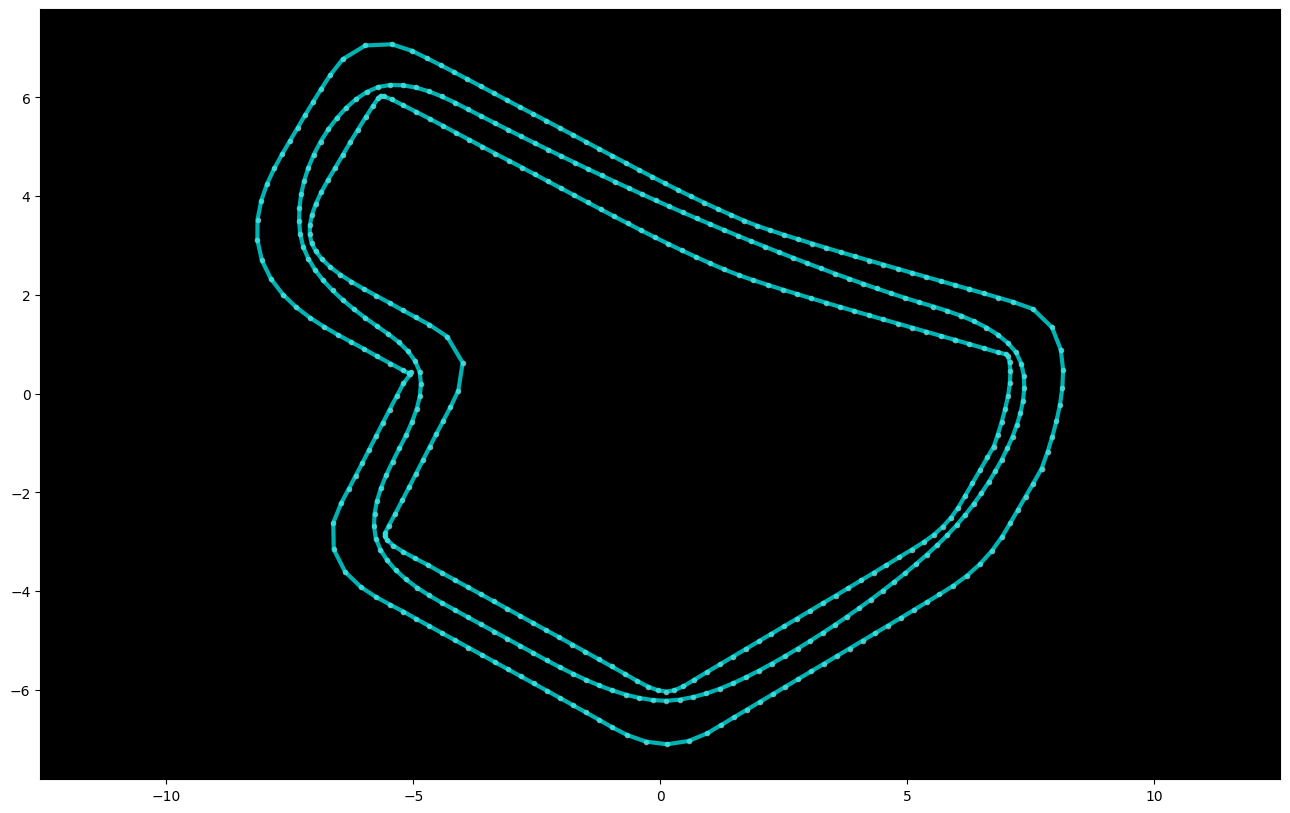

In [5]:
from numpy import array

fname = './racelines/2022_september_open-2000-4-2022-10-23-145109.py'
with open(fname, "r") as file:
    deserialized = eval(file.read())
racing_line = deserialized
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, racing_line, inner_border, outer_border)

In [6]:
FILL = 5.47
npoints = len(racing_line)
cubic_spline = scipy.interpolate.CubicSpline(np.arange(npoints), racing_line)
racing_line_populated = cubic_spline(np.linspace(0, npoints - 1, int((npoints - 1) * FILL)))

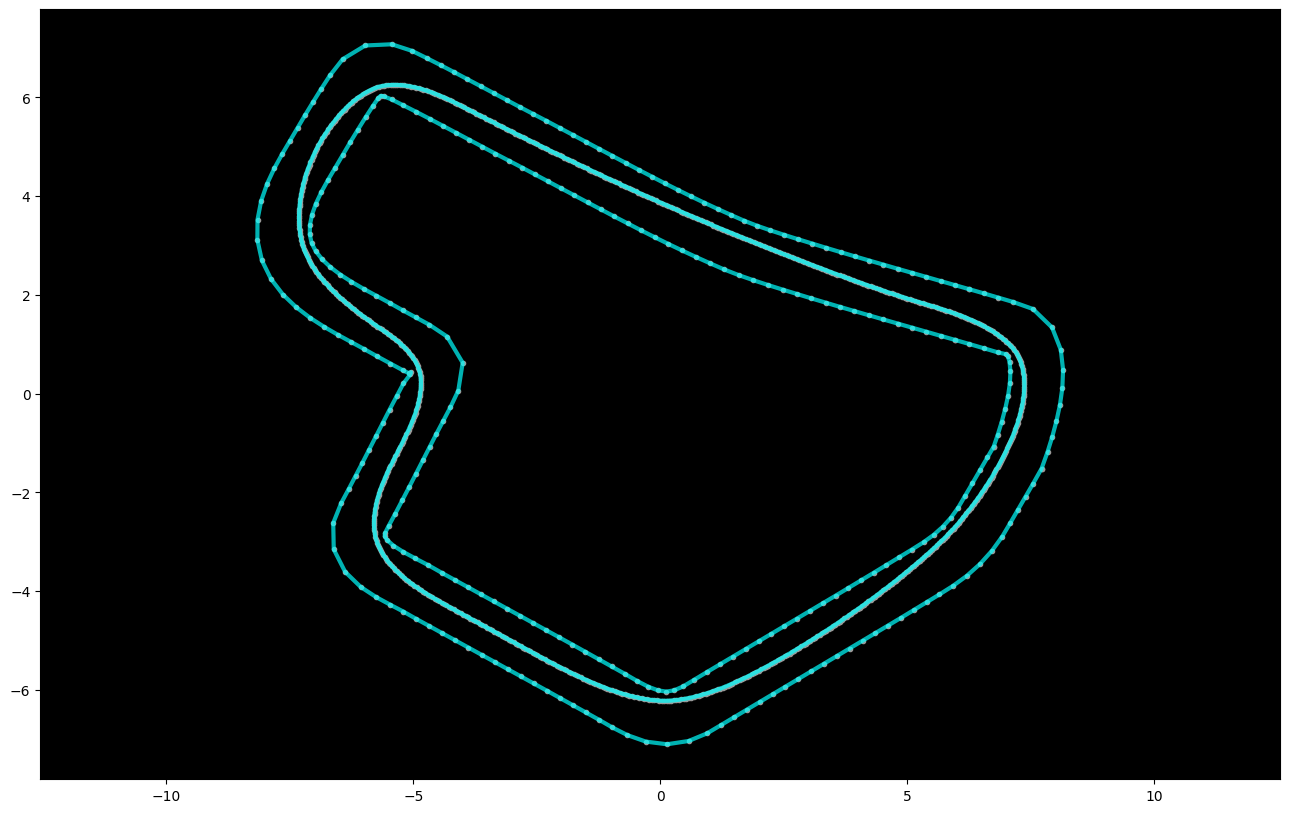

In [7]:
from numpy import array

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, racing_line_populated, inner_border, outer_border)

In [8]:
len(racing_line_populated)

825

In [9]:
from datetime import datetime
import sys

now = datetime.now()
prefix = './racelines-populated/%s-cubspl-%.2f-%s' % (TRACK_NAME, FILL, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(helper_utils.array2D_repr_columns(racing_line_populated, 5))

print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, racing_line_populated)

Writing python code to ./racelines-populated/2022_september_open-cubspl-5.47-2022-12-18-145359.py
Writing numpy binary to ./racelines-populated/2022_september_open-cubspl-5.47-2022-12-18-145359.npy
